# L1 regularization

Goals:
- hand-code the polynomial regression algorithm with L1 regularization on a toy dataset
- study the effect of L1 regularization on the convergence

## Import basic libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Create a toy dataset

In [2]:
import math

N = 100
D = 2

# data is normally distributed with mean data_mu and variance data_sigma
data_mu = .5
data_sigma = 1

# we believe that there is a "true" underlying dependency x2 = true_w1 * x1 + true_w2 * x1*x1 + true_b
# and if some x2 do not land on the line exactly, its due to an error
true_w1 = 4.5
true_w2 = -3.5
true_b = 2.5

# error is normally distributed random variable with mean err_mu and variance err_sigma
# that is, the error is sum of many different random influences
err_mu = 0
err_sigma = 1.5

# make up the dataset
data = np.empty([N, D], dtype=float)
data[:, 0] = data_sigma * np.random.randn(N) + data_mu
data[:, 1] = err_sigma * np.random.randn(N) + err_mu # errors
data[:, 1] = data[:, 0] * true_w1 + data[:, 0] * data[:, 0] * true_w2 + true_b + data[:, 1]

# peek into the dataset
data[:5]

array([[-0.44131739,  0.44594523],
       [ 0.89331468,  3.50556492],
       [ 0.33992066,  5.58922201],
       [-0.87245326, -2.96461657],
       [-0.27569777, -0.82702719]])

## Plot the toy dataset

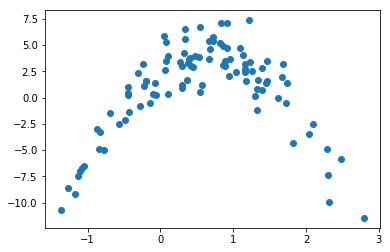

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Model the relationship

In [4]:
# We are going to model the data using third degree polynomial
# x2 = w1 * x1 + w2 * x1*x1 + w3 * x1*x1*x1 + b

# initial values for w and b
w1 = 1.0
w2 = 1.0
w3 = 2.5
b = 0.0

# predicts target values according to the model
def predict(X):
    return X*w1 + X*X*w2 + X*X*X*w3 + b

### Untrained regression

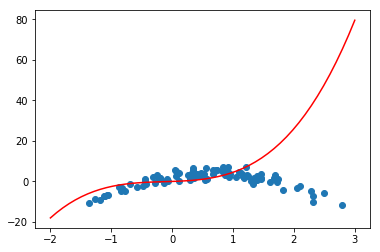

In [5]:
x = np.linspace(-2.0, 3.0)
Y = predict(x)

plt.scatter(data[:, 0], data[:, 1])
plt.plot(x, Y, color='red')

## Train the model

### Split into training set and validation set

In [6]:
X_train = data[:-10, 0]
T_train = data[:-10, 1]

X_test = data[-10:, 0]
T_test = data[-10:, 1]

### Plot the train and test data

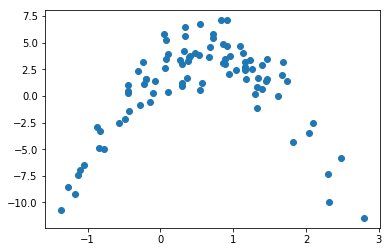

In [7]:
plt.scatter(X_train, T_train)

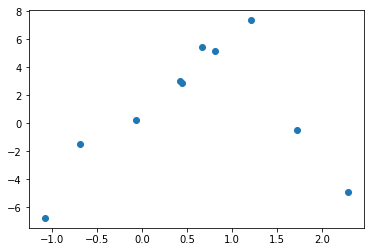

In [8]:
plt.scatter(X_test, T_test)

### Loss function

In [9]:
# Mean squared error
def mean_squared_error(T, Y):
    return np.square(Y - T).mean()

### Gradient descent - no regularization

In [10]:
# initial parameters
w1 = 1.0
w2 = 1.0
w3 = 1.0
b = 0.0

# training rate
alpha = 0.01

# error_delta
err_delta = 0.0001

# get starting error
Y_train = predict(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 100 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w1 = ((Y_train - T_train) * X_train).mean()
    grad_w2 = ((Y_train - T_train) * X_train*X_train).mean()
    grad_w3 = ((Y_train - T_train) * X_train*X_train*X_train).mean()
    grad_b = (Y_train - T_train).mean()
    w1 = w1 - alpha * grad_w1
    w2 = w2 - alpha * grad_w2
    w3 = w3 - alpha * grad_w3
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 72.93538360971993
error: 8.924511775377173
error: 5.919721463654691
error: 4.405509371723525
error: 3.614574906430124
error: 3.1893028810827055
error: 2.9533972384706773
error: 2.8179802621040486
error: 2.737428016322298
error: 2.687822120121097
error: 2.6562957729156538
error: 2.6357129020709302
error: 2.6219785985301316
final error: 2.6187011163481615
iterations: 1231


### Validate the model

In [11]:
Y_test = predict(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

3.05313085905651

### Plot the prediction line

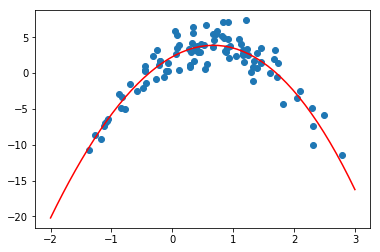

In [12]:
plt.scatter(data[:, 0], data[:, 1])

x = np.linspace(-2.0, 3.0)
plt.plot(x, predict(x), color='red')

### Learned parameters

In [13]:
[w1, w2, w3, b]

[4.706519825770431,
 -3.409746508542223,
 -0.07229936095416681,
 2.267499804066454]

### Gradient descent - L1 regularization

In [14]:
# initial parameters
w1 = 1.0
w2 = 1.0
w3 = 1.0
b = 0.0

# training rate
alpha = 0.01

# regularisation parameter
gamma = 0.1

# error_delta
err_delta = 0.0001

# get starting error
Y_train = predict(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 100 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w1 = ((Y_train - T_train) * X_train + gamma * np.sign(w1)).mean()
    grad_w2 = ((Y_train - T_train) * X_train*X_train + gamma * np.sign(w2)).mean()
    grad_w3 = ((Y_train - T_train) * X_train*X_train*X_train + gamma * np.sign(w3)).mean()
    grad_b = (Y_train - T_train + gamma * np.sign(b)).mean()
    w1 = w1 - alpha * grad_w1
    w2 = w2 - alpha * grad_w2
    w3 = w3 - alpha * grad_w3
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 72.93538360971993
error: 9.21254342864083
error: 6.334274379170665
error: 4.825939716785681
error: 3.9975657294427664
error: 3.523823822831996
error: 3.2414951128634266
error: 3.066146588279136
error: 2.9528899124437267
error: 2.8771186643893416
error: 2.824869540557042
error: 2.7879177208687587
error: 2.761231821932605
error: 2.7416211530715944
error: 2.7269957157971683
final error: 2.71731900469987
iterations: 1486


### Validate the model

In [15]:
Y_test = predict(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

3.2346586737239127

### Plot the prediction line

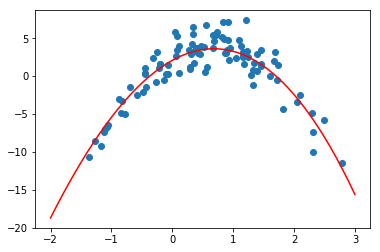

In [16]:
plt.scatter(data[:, 0], data[:, 1])

x = np.linspace(-2.0, 3.0)
plt.plot(x, predict(x), color='red')

### Learned parameters

In [17]:
[w1, w2, w3, b]

[4.44720557578782,
 -3.163853941302198,
 -0.09499400414192026,
 2.0798208331927257]

## Conclusions

Even without regularization, the polynomial regression learns not to use the third degree term when not needed.
On a toy dataset that is modeled by the second degree polynmial the effect of regularization is not obvious.